### **Chapter 1:  Getting Started with Image Processing**

#### Ex. 7: Make a 3D plot for each of the color channels of the parrot image used in this chapter (hint: use the mpl_toolkits.mplot3d module's plot_surface() function and NumPy's meshgrid() function).<p>
***

#### 1. Import các thư viện cần thiết

In [20]:
# Import các thư viện cần thiết
# type: ignore
from skimage.io import imread
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

- skimage.io.imread: Import imread từ skimage.io để giúp đọc ảnh với nhiều định dạng khác nhau.
- numpy as np: Import thư viện numpy với tên np để thao tác với dữ liệu dạng mảng.
- matplotlib.pylab as plt: Import matplotlib.pylab để tạo các biểu đồ và hình ảnh.
- Axes3D, cm, LinearLocator, FormatStrFormatter: Các công cụ này hỗ trợ tạo biểu đồ 3D và định dạng biểu đồ trong matplotlib.

#### 2. Đọc ảnh và trích xuất các kênh màu

In [21]:
# Đọc ảnh 
im = imread('parrot.jpg')
Y = np.arange(im.shape[0]) # Y-axis 
X = np.arange(im.shape[1]) # X-axis
X, Y = np.meshgrid(X, Y)

- imread('parrot.jpg'): Hàm imread từ thư viện skimage.io được dùng để đọc ảnh từ file 'parrot.jpg' và lưu vào biến im.
- np.arange(im.shape[0]): tạo dãy cho trục Y từ 0 đến chiều cao của ảnh.
- np.arange(im.shape[1]): tạo dãy cho trục X từ 0 đến chiều rộng của ảnh.
- np.meshgrid(X, Y): tạo ma trận tọa độ X và Y phù hợp với kích thước của ảnh. Điều này giúp ánh xạ mọi điểm trong Z đến một tọa độ trên biểu đồ 3D.

In [ ]:
# Trích xuất các kênh màu
Z1 = im[...,0] # Truy cập vào kênh màu đỏ
Z2 = im[...,1] # Truy cập vào kênh màu lục
Z3 = im[...,2] # Truy cập vào kênh màu xanh

- Z là một mảng 2D có kích thước (height, weight), trong đó mỗi phần tử là giá trị độ sáng của kênh màu cụ thể tại vị trí tương ứng trong ảnh gốc.
- Mảng Z1, Z2, Z3 đại diện lần lượt cho các giá trị độ sáng của một kênh màu Đỏ, Lục, Xanh.

#### 3. Xây dựng hàm vẽ biểu đồ 3D

In [1]:
# Hàm vẽ biểu đồ 3D 
def plot_3d(X, Y, Z, cmap='Reds', title=''):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111, projection='3d') 
    # Vẽ bề mặt
    surf = ax.plot_surface(X, Y, Z, cmap=cmap, linewidth=0, antialiased=False, rstride=2, cstride=2, alpha=0.5)
    ax.xaxis.set_major_locator(LinearLocator(10))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    ax.view_init(elev=10., azim=5)
    ax.set_title(title, size=20)
    plt.show()

+ Hàm plot_3d: Hàm này vẽ biểu đồ 3D của một kênh màu, nó hiển thị (x, y, f(x,y)) cho tất cả các giá trị x, y
    + Ba mảng 2D X, Y, Z: tương ứng với tọa độ x, y và giá trị độ cao z, giúp biểu diễn độ sáng hoặc màu sắc của kênh ảnh.
    + Tham số cmap: Đặt bảng màu (color map) cho biểu đồ.
    + Tham số title: Tiêu đề biểu đồ.
+ fig = plt.figure(figsize=(15,15)): tạo một khung vẽ cho biểu đồ với kích thước 15x15 inch.    
+ ax = fig.gca(projection='3d'): tạo một trục 3D trên khung fig.
+ surf = ax.plot_surface(X, Y, Z, cmap=cmap, linewidth=0, antialiased=False, rstride=2, cstride=2, alpha=0.5): Vẽ bề mặt 3D
    + X và Y là tọa độ trên mặt phẳng ngang.
    + Z là giá trị độ cao, giúp biểu diễn mức độ sáng hoặc màu sắc cho từng tọa độ (x, y).
    + cmap=cmap: Bảng màu được sử dụng để tô màu cho bề mặt theo giá trị của Z.
    + linewidth=0: Không vẽ viền cho các ô trên bề mặt.
    + antialiased=False: Tắt chế độ chống răng cưa để vẽ bề mặt nhanh hơn.
    + rstride=2, cstride=2: Bước di chuyển của các đường row và column là 2, giúp giảm độ chi tiết của bề mặt và tăng tốc độ vẽ.
    + alpha=0.5: Đặt độ trong suốt của bề mặt (0 là trong suốt hoàn toàn, 1 là không trong suốt).
+ ax.xaxis.set_major_locator(LinearLocator(10)): đặt 10 giá trị chính trên trục x, phân chia đều đặn và giúp biểu đồ dễ đọc hơn.
+ ax.xaxis.set_major_formatter(FormatStrFormatter('%.02f')): định dạng các giá trị của trục x thành dạng thập phân với 2 chữ số sau dấu phẩy.
+ ax.view_init(elev=10., azim=5): thiết lập góc nhìn của trục 3D.
+ ax.set_title(title, size=20): thiết lập tiêu đề của biểu đồ với kích thước chữ là 20.
+ plt.show(): hiển thị biểu đồ 3D trên màn hình.


#### 4. Vẽ biểu đồ 3D cho kênh màu

##### Kênh màu đỏ

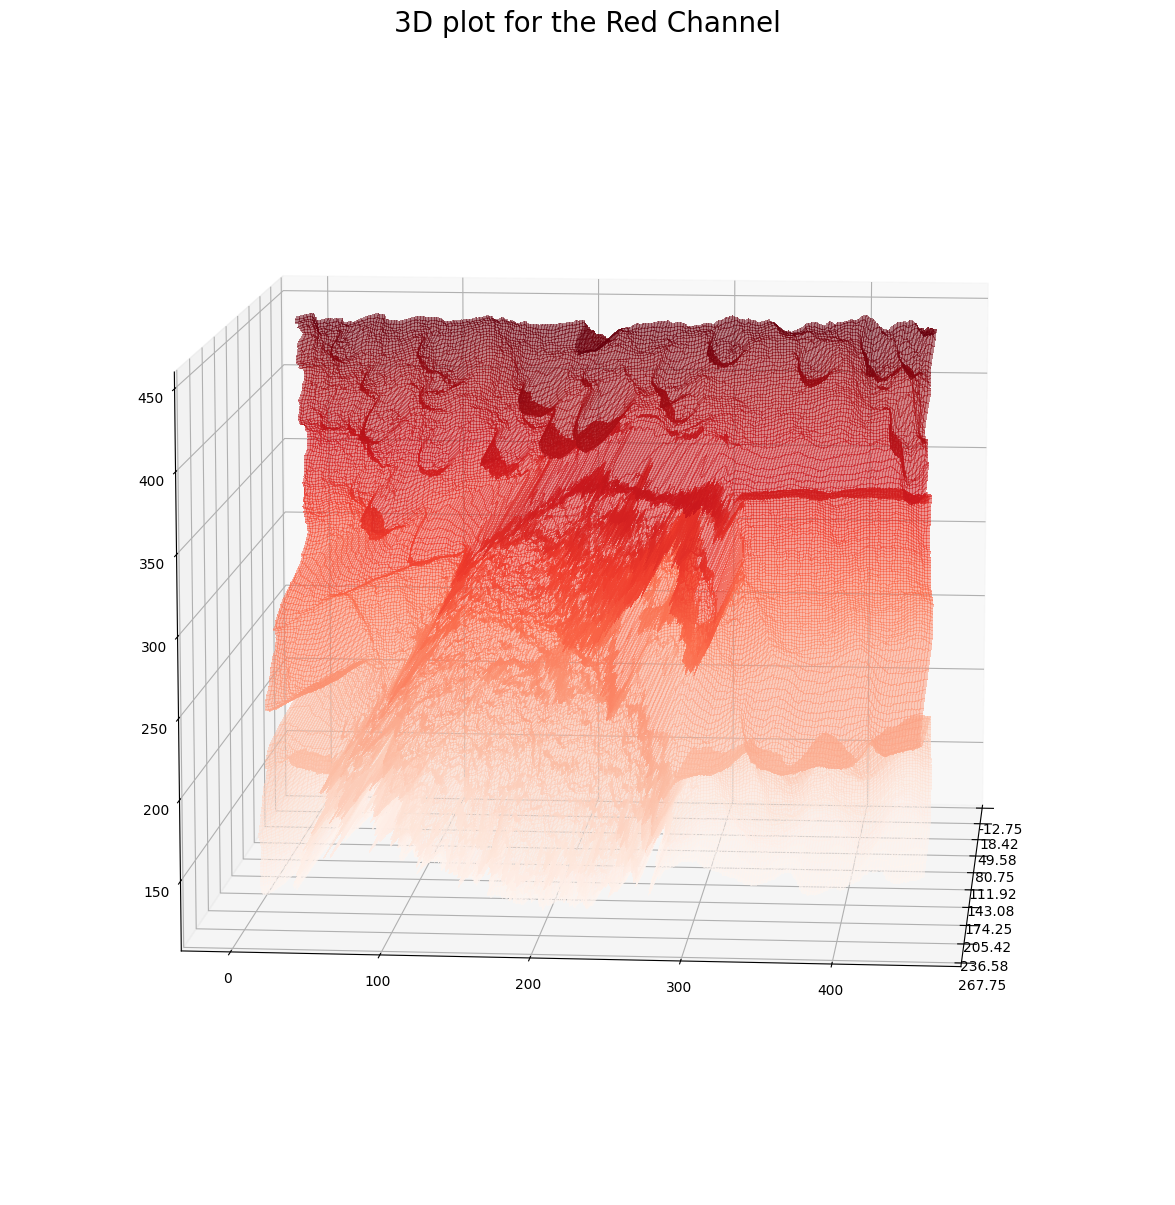

In [24]:
plot_3d(Z1, X, im.shape[1]-Y, cmap='Reds', title='3D plot for the Red Channel')

##### Kênh màu Lục

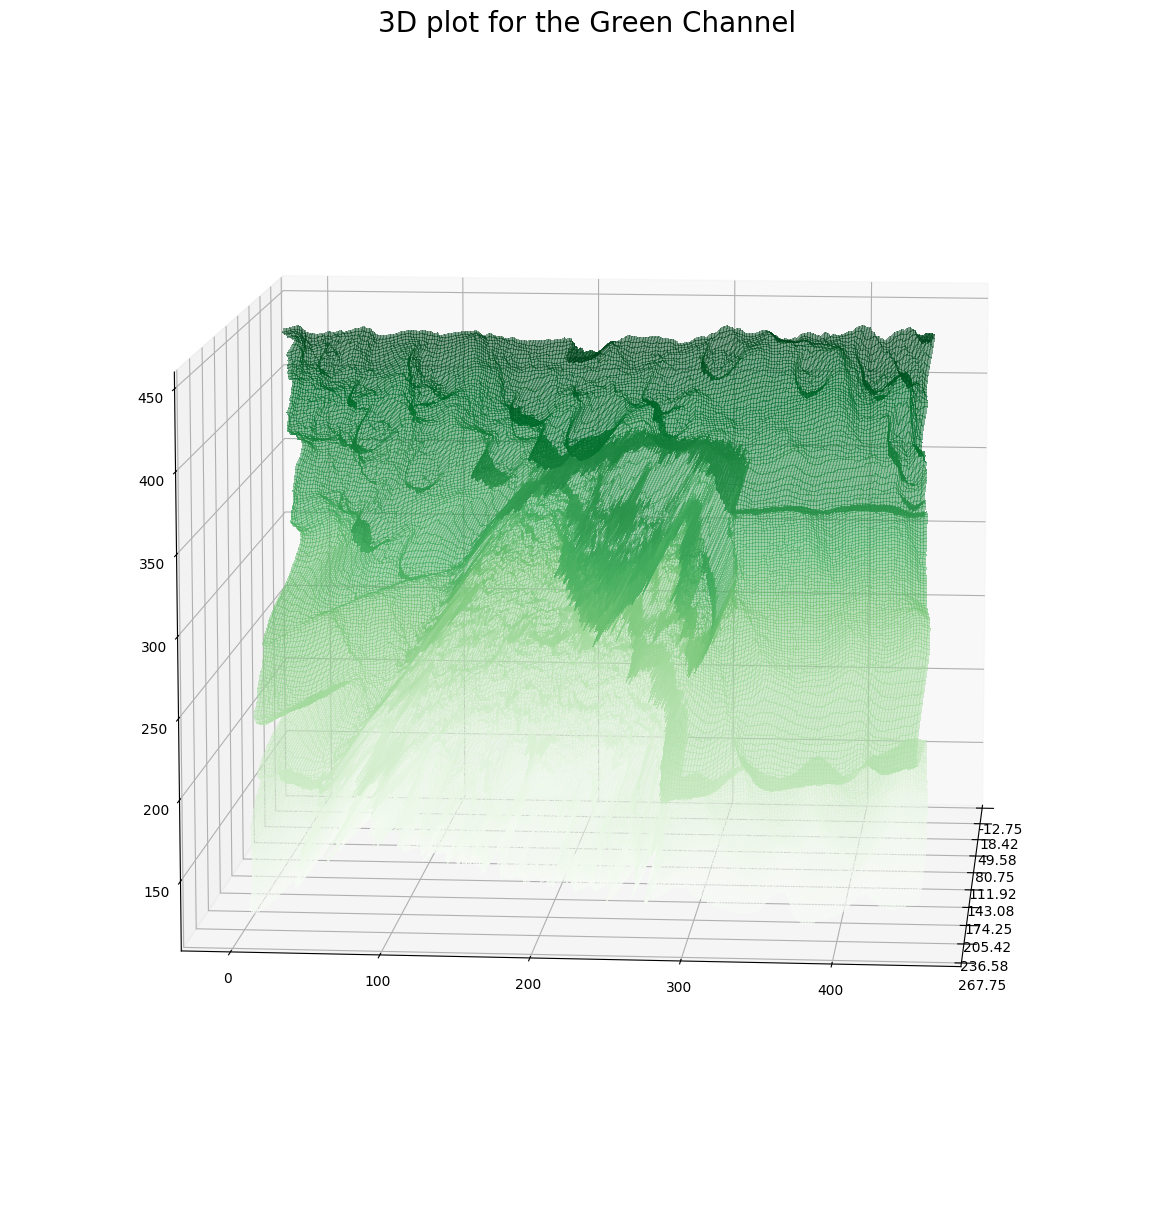

In [25]:
plot_3d(Z2, X, im.shape[1]-Y, cmap='Greens', title='3D plot for the Green Channel')

##### Kênh màu xanh

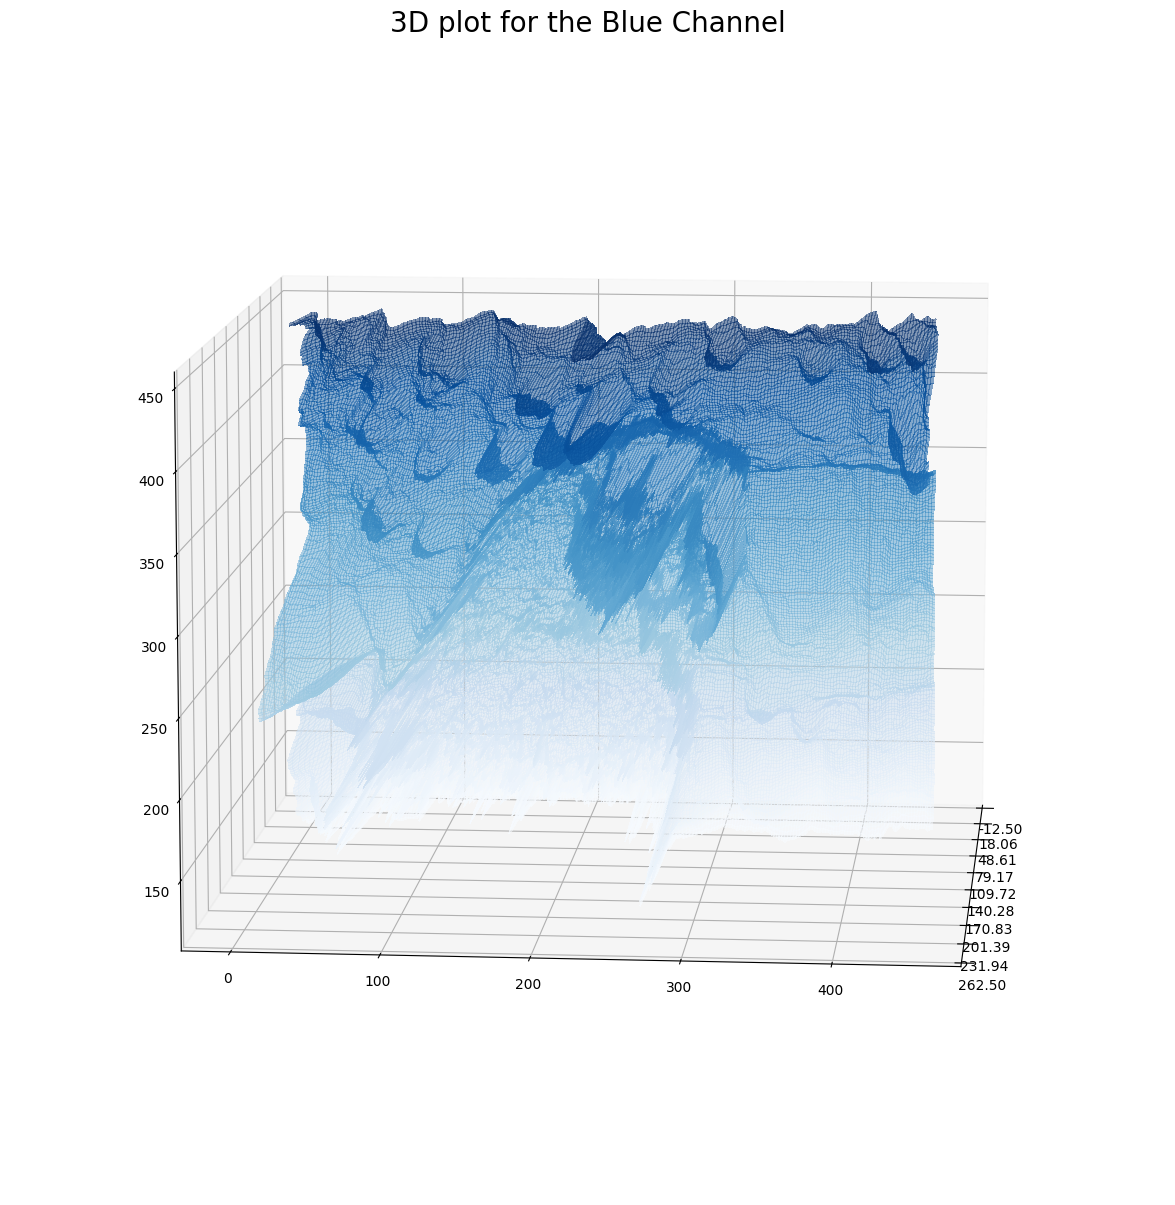

In [26]:
plot_3d(Z3, X, im.shape[1]-Y, cmap='Blues', title='3D plot for the Blue Channel')